# This solution is related to the Problem Statement 1 for Survey Buddy Internship.

I have used alexa_reviews dataset from Kaggle for demonstration. I will be using Rake-nltk and tfidf vectorize for solution.

In [200]:
#Importing basic libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [201]:
#Loading dataset
df=pd.read_csv('amazon_alexa.tsv', sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
rating              3150 non-null int64
date                3150 non-null object
variation           3150 non-null object
verified_reviews    3150 non-null object
feedback            3150 non-null int64
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [203]:
#maybe not needed
lens=df['verified_reviews'].unique()
len(lens)

2301

In [204]:
l=df['verified_reviews'].value_counts()
l[0:40]

#I think longer statements repeating twice or thrice might be a data repetition problem. It can be worked upon.

                                                                                                                                                                                                                                                                                                                                                                                       79
Love it!                                                                                                                                                                                                                                                                                                                                                                               22
Love it                                                                                                                                                                                                                                             

In [205]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [206]:
#Text preprocessing
#Step 1: Transforming to lowercase

df['reviews_lc']=df['verified_reviews'].str.lower()
df['reviews_lc'].head()

0                                        love my echo!
1                                            loved it!
2    sometimes while playing a game, you can answer...
3    i have had a lot of fun with this thing. my 4 ...
4                                                music
Name: reviews_lc, dtype: object

In [207]:
#Step 2: Removing stopwords and punctuation
import nltk
from nltk.corpus import stopwords

sw=stopwords.words('english')

In [208]:
import re
from nltk.tokenize import word_tokenize

def transform_text(s):
    
    #remove tags
    s=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",s)
    
    # remove special characters and digits
    s=re.sub("(\\d|\\W)+"," ",s)
    
    # remove stopwords
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        # remove words with len = 2 AND stopwords
        if len(w) > 2 and w not in sw:
            new_string.append(w)
 
    s = ' '.join(new_string)
    
    return s.strip()

In [209]:
df['reviews_sw'] = df['reviews_lc'].apply(transform_text)
df['reviews_sw'].head()

0                                            love echo
1                                                loved
2    sometimes playing game answer question correct...
3    lot fun thing old learns dinosaurs control lig...
4                                                music
Name: reviews_sw, dtype: object

In [210]:
#Step 3: Lemmatizing
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer() 

def lemmatizer_text(s):
    tokens = nltk.word_tokenize(s)
    
    new_string = []
    for w in tokens:
        lem = lemmatizer.lemmatize(w, pos="v")
        # exclude if lenght of lemma is smaller than 2
        if len(lem) > 2:
            new_string.append(lem)
    
    s = ' '.join(new_string)
    return s.strip()

In [211]:
df['reviews_lm'] = df['reviews_sw'].apply(lemmatizer_text)
df['reviews_lm'].head()

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing old learn dinosaurs control ligh...
4                                                music
Name: reviews_lm, dtype: object

In [212]:
#Step 4: Removing rare words
text = ' '.join(df['reviews_lm'])
len(text)

240177

In [213]:
text_series=pd.Series(text.split())
freq_comm = text_series.value_counts()
rare_words = freq_comm[freq_comm==1]
len(rare_words)

1087

In [214]:
rare_words

existent          1
interfere         1
defeat            1
surface           1
overprice         1
                 ..
distort           1
community         1
indicator         1
disconnections    1
karen             1
Length: 1087, dtype: int64

In [215]:
# Removing 1087 rare occuring words 
df['reviews_lm1'] = df['reviews_lm'].apply(lambda x: ' '.join([word for word in x.split() if word not in rare_words]))
df['reviews_lm1'].head()

0                                            love echo
1                                                 love
2    sometimes play game answer question correctly ...
3    lot fun thing old learn control light play gam...
4                                                music
Name: reviews_lm1, dtype: object

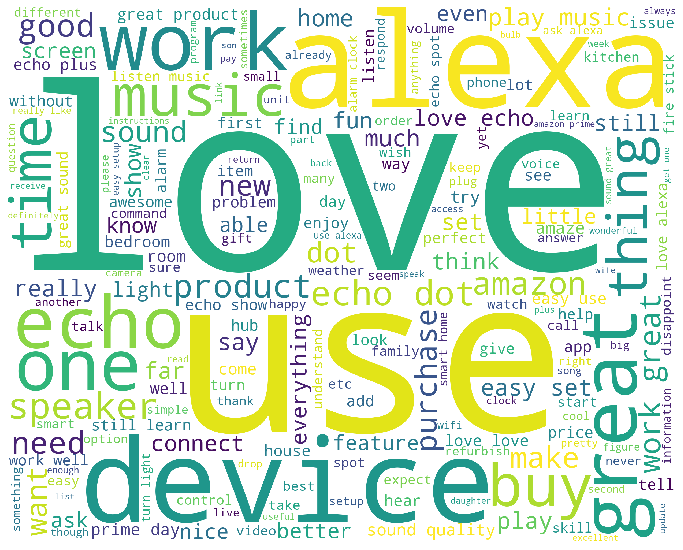

In [216]:
from wordcloud import WordCloud,STOPWORDS

wordcloud1 = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=2500,
                      height=2000
                      ).generate(" ".join(df['reviews_lm1']))

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

In [217]:
# 1. Using Rake library
import RAKE

In [218]:
%%time
rake_obj=RAKE.Rake(sw)
k1=[]

for i in range(0,len(df['reviews_lm1'])):
    k1.append(rake_obj.run(df['reviews_lm1'][i], maxWords=3))

Wall time: 405 ms


In [219]:
def Sort_tuple(tup):
    tup.sort( key = lambda x: x[1],reverse=True)
    return tup

In [220]:
k1_list = [item for sublist in k1 for item in sublist]
k1_list=Sort_tuple(k1_list)
k1_list

[('love love love', 9.0),
 ('love wife hat', 9.0),
 ('sound great love', 9.0),
 ('like google better', 9.0),
 ('work sound great', 9.0),
 ('outlet work disappoint', 9.0),
 ('alexa else say', 9.0),
 ('awesome understand kid', 9.0),
 ('sad joke worthless', 9.0),
 ('love great product', 9.0),
 ('still discover echo', 9.0),
 ('speaker sound good', 9.0),
 ('work absolutely great', 9.0),
 ('buy wife love', 9.0),
 ('easy use amaze', 9.0),
 ('easy set issue', 9.0),
 ('impress sound quality', 9.0),
 ('love pretty cool', 9.0),
 ('alexa hardly come', 9.0),
 ('five need say', 9.0),
 ('awesome love alexa', 9.0),
 ('love work well', 9.0),
 ('refurbish work great', 9.0),
 ('sound work great', 9.0),
 ('love great fun', 9.0),
 ('get mom love', 9.0),
 ('great like new', 9.0),
 ('please order want', 9.0),
 ('love echo dot', 9.0),
 ('love great product', 9.0),
 ('work good satisfy', 9.0),
 ('like uncle little', 9.0),
 ('work like new', 9.0),
 ('add room convenience', 9.0),
 ('cant figure use', 9.0),
 ('wo

# 1. Results

RAKE short for Rapid Automatic Keyword Extraction algorithm, is a domain independent keyword extraction algorithm which tries to determine key phrases in a body of text by analyzing the frequency of word appearance and its co-occurance with other words in the text.

I think it is fast and easy and we see some good results. However, I also notice some repeated keyphrases. More work can be done on this.

In [221]:
# 2. Using Rake-nltk
from rake_nltk import Rake

r=Rake(max_length=3)

In [222]:
%%time
r.extract_keywords_from_sentences(df['reviews_lm1'])

Wall time: 96.7 ms


In [223]:
k2=r.get_ranked_phrases_with_scores()[0:20]

In [224]:
k2

[(9.0, 'worth every cent'),
 (9.0, 'smart sweet design'),
 (9.0, 'sad joke worthless'),
 (9.0, 'powerful little stick'),
 (9.0, 'plenty options choose'),
 (9.0, 'meet every expectation'),
 (9.0, 'item speak spanish'),
 (9.0, 'handy hell recommend'),
 (9.0, 'hand free control'),
 (9.0, 'connect phone playlist'),
 (9.0, 'alarm calendar reminders'),
 (9.0, 'add room convenience'),
 (8.833333333333334, 'size screen thing'),
 (8.818181818181818, 'use alarm clock'),
 (8.75, 'video call mom'),
 (8.666666666666666, 'usual reliable alexa'),
 (8.666666666666666, 'think read mind'),
 (8.666666666666666, 'live without alexa'),
 (8.666666666666666, 'cheap cheap sound'),
 (8.666666666666666, 'alexa else say')]

# 2. Results

RAKE-NLTK is a modified version that uses the natural language processing toolkit.

It is very fast but we see some different and useful results.


In [226]:
# 3. Using gensim
import gensim

In [230]:
%%time
k3=[]

for i in range(0,len(df['reviews_lm1'])):
    k3.append(gensim.summarization.keywords(df['reviews_lm1'][i],        
             split=True,              
             scores=True,            
             pos_filter=('NN', 'JJ'),
             lemmatize=False,         
             deacc=True))

Wall time: 4.51 s


In [231]:
k3_list = [item for sublist in k3 for item in sublist]
k3_list=Sort_tuple(k3_list)
k3_list

[('great', 0.7925789920302366),
 ('great', 0.7925789920302361),
 ('use', 0.7925789920302359),
 ('echo', 0.731395418031648),
 ('echo', 0.7313954180316476),
 ('device', 0.7288857662234048),
 ('devices', 0.7288857662234048),
 ('device', 0.7288857662234047),
 ('devices', 0.7288857662234047),
 ('love', 0.7288857662234046),
 ('use', 0.7288857662234045),
 ('great', 0.7188483694075956),
 ('useful', 0.718651378897773),
 ('use', 0.718651378897773),
 ('new', 0.7032078297389303),
 ('google', 0.7032078297389298),
 ('set', 0.6829189345613327),
 ('devices', 0.6747073060501638),
 ('device', 0.6747073060501638),
 ('love', 0.6744832684273772),
 ('love', 0.674483268427377),
 ('set', 0.6706208784260133),
 ('set', 0.6706208784260128),
 ('clock', 0.6613953377885904),
 ('use', 0.6613953377885904),
 ('need', 0.6525526168597007),
 ('refurbish', 0.6525526168597001),
 ('work', 0.6525526168596999),
 ('prime', 0.6525526168596998),
 ('like', 0.6525526168596998),
 ('movie', 0.6525526168596998),
 ('work', 0.652552616

# 3. Results

Gensim is an open-source library for natural language processing, using modern statistical machine learning.

I am not happy with the results and, therefore, would like to explore it more.
